# Validating Data-MC ntuples

Oct. 18th 2016.  

Validating Data-MC for full, DY, WW, TT, Z &rarr; &tau; &tau; .

In [1]:
run prep_ana.py

loading data frame named df.
finished loading data frame
unc_mc_process and scales are dictionaries
scale_data = (5.27/19.7)


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [3]:
# loading MC datasets
df_WW = rp.read_root("data/WW_tot_complete.root", "trees_vec")
df_WZ_3ln = rp.read_root("data/WZ_3ln_0.root", "trees_vec")
df_WZ_2l2q = rp.read_root("data/WZ_2l2q_0.root", "trees_vec")
df_DY = rp.read_root("data/DY_ll_complete.root", "trees_vec")
df_TT = rp.read_root("data/TT_ll_complete.root", "trees_vec")
df_ZZ = rp.read_root("data/ZZ_tot_complete.root", "trees_vec")

# Concat MC sets 
df_WZ_3ln["process"] = "WZ_3ln"
df_WZ_2l2q["process"] = "WZ_2l2q"
df_mc = pd.concat( [df_WW, df_WZ_3ln, df_WZ_2l2q, df_DY, df_TT, df_ZZ] )

In [4]:
df_sept = rp.read_root("data/pan_process_March.root")

In [2]:
# loading Data datasets
df_A = rp.read_root("data/Da_A_0.root", "trees_vec")
df_B = rp.read_root("data/Da_B_complete.root", "trees_vec")
df_C = rp.read_root("data/Da_C_complete.root", "trees_vec")
df_D = rp.read_root("data/Da_D_complete.root", "trees_vec")

df_data = pd.concat( [df_A, df_B, df_C, df_D] )

In [5]:
scales = {"WW":       19.7e3 * 59.8 /  10000431.0 ,\
          "DY":       19.7e3 * 3531.9 / 30459500. ,\
          "TT":       19.7e3 * 25.81 / 12011428.,\
          "ZZ":       19.7e3 * 9.03 / 9799908.,\
          "WZ_2l2q":  19.7e3 * 2.24 / 3215990,\
          "WZ_3ln":   19.7e3 * 1.07 / 2017979. ,\
          "WZ":       19.7e3 * 1.07 / 2017979., "WJ": 1, "Da": 1 }

## Full 

(<matplotlib.figure.Figure at 0x199449990>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x194cadc90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x19b1726d0>], dtype=object))

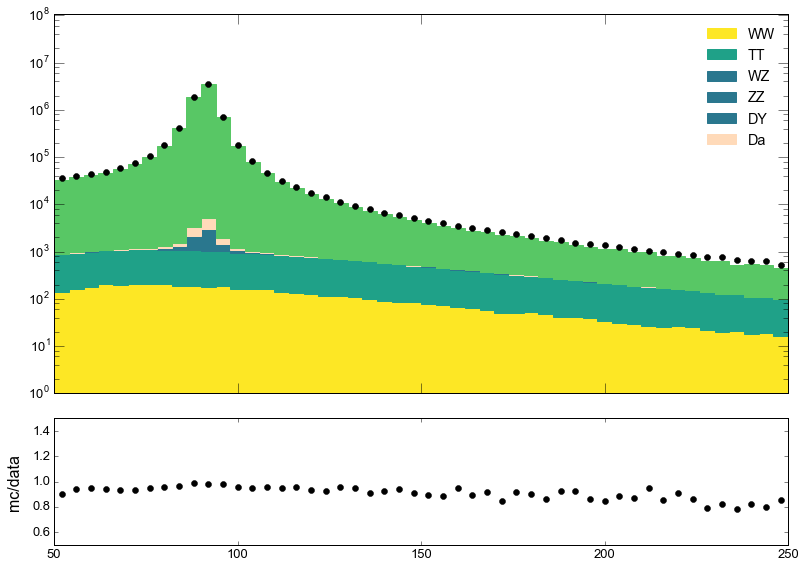

In [27]:
feature = "mll"
range = (50, 250)
bins = 50

mc_bins = bin_df( df_mc[ (df_mc.lep1_type == 13) & (df_mc.lep2_type == 13)], feature, range=range, scales=scales, bins=bins )
data_bins = bin_df( df_data[(df_data.lep1_type == 13) & (df_data.lep2_type == 13)], feature, range=range, scales=scales, bins=bins)
full_plot( mc_bins, data_bins)

## DY

## WW

new version
new version
WW
TT
WZ_2l2q
WZ_3ln
WZ
ZZ
DY


(<matplotlib.figure.Figure at 0x11daf7950>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11db7c750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e731b50>], dtype=object))

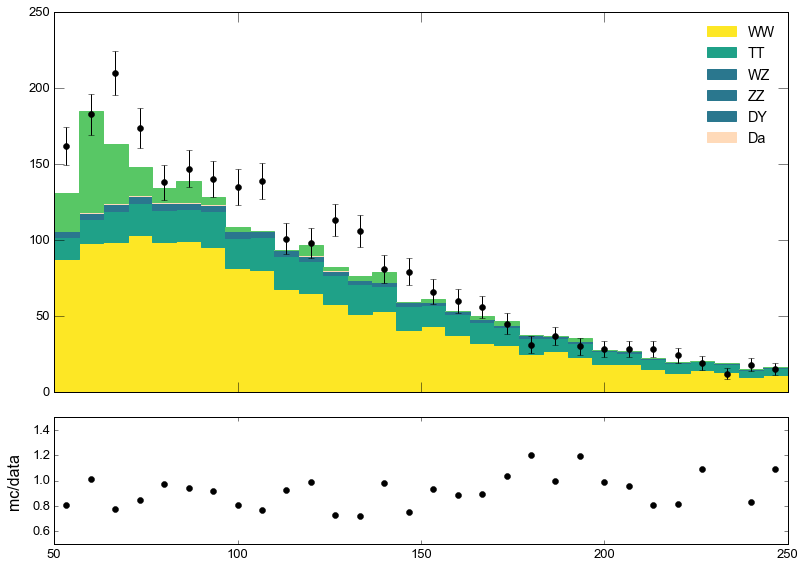

In [7]:
cut_mc = WW_ana(df_mc)
cut_data = WW_ana(df_data)

feature = "mll"
range = (50, 250)
bins = 30

mc_bins = bin_df( cut_mc, feature, range=range, bins=bins, scales=scales, lumi_scale=1 )
data_bins = bin_df( cut_data, feature, range=range, scales=scales, bins=bins, lumi_scale=1)
full_plot( mc_bins, data_bins, logy=False, y_range=True)

## TT

(<matplotlib.figure.Figure at 0x194afc150>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x19c905950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x19c0be210>], dtype=object))

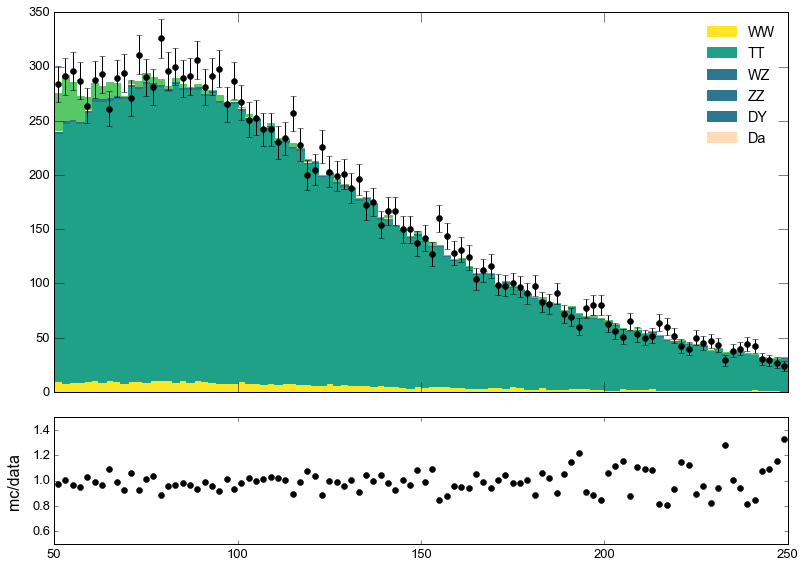

In [30]:
cut_mc = TT_ana(df_mc)
cut_data = TT_ana(df_data)

feature = "mll"
range = (50, 250)

mc_bins = bin_df( cut_mc, feature, range=range )
data_bins = bin_df( cut_data, feature, range=range, scales=scales)
full_plot( mc_bins, data_bins, logy=False, y_range=True)

## 

## Extra

(<matplotlib.figure.Figure at 0x1326a5710>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x135352150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13b83ad50>], dtype=object))

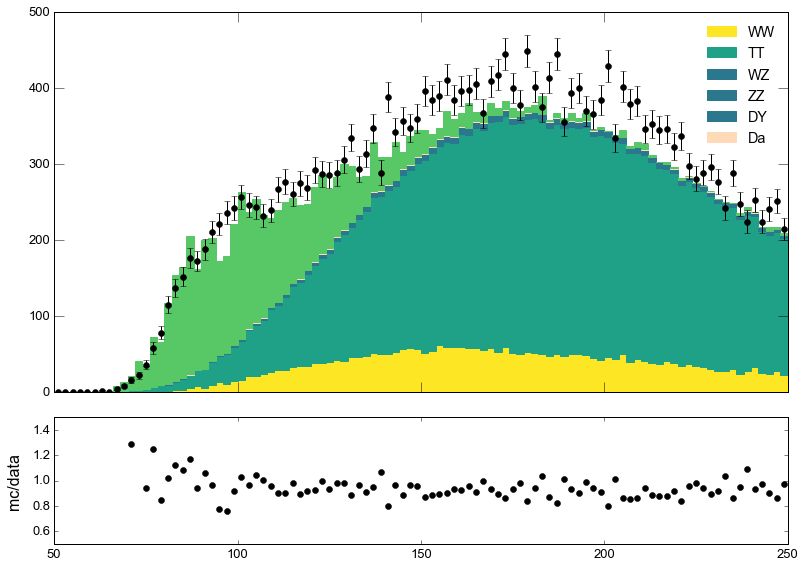

In [13]:
feature = "mllMET"
range = (50, 250)

mc_bins = bin_df( df_mc[(df_mc.METProj_cos > 20) & (df_mc.lep_Type > 0) & (df_mc.mll > 50)], feature, range=range, scales=scales )
data_bins = bin_df( df_data[(df_data.METProj_cos > 20) & (df_data.lep_Type > 0) & (df_data.mll > 50)], feature, range=range, scales=scales)
full_plot( mc_bins, data_bins, y_range=True, logy=False)

(<matplotlib.figure.Figure at 0x194ecb210>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x195114ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x196819450>], dtype=object))

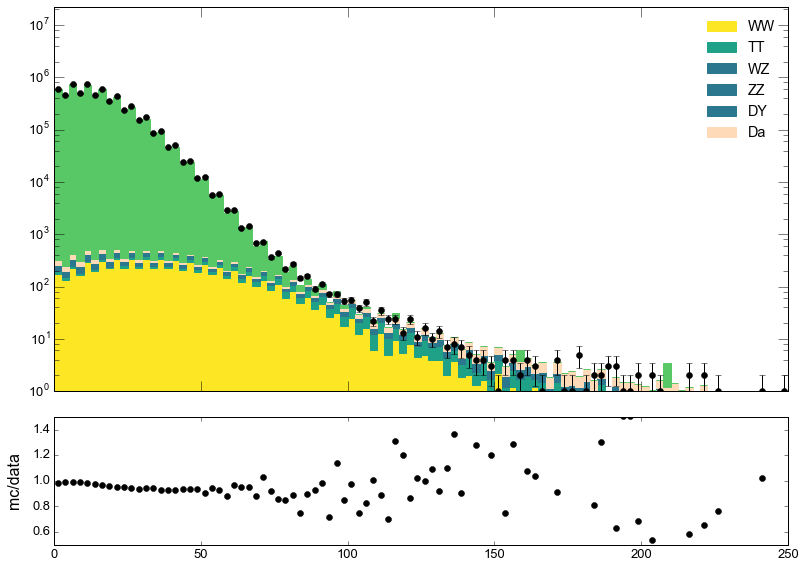

In [23]:
feature = "METProj_cos"
range = (0, 250)

mc_bins = bin_df( df_mc[ (df_mc.mll > 50) & (df_mc.numb_jets ==0)], feature, range=range, scales=scales )
data_bins = bin_df( df_data[  (df_data.mll > 50) & (df_data.numb_jets ==0)], feature, range=range, scales=scales)
full_plot( mc_bins, data_bins, )

(<matplotlib.figure.Figure at 0x13460e410>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x195a44350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x196fe3490>], dtype=object))

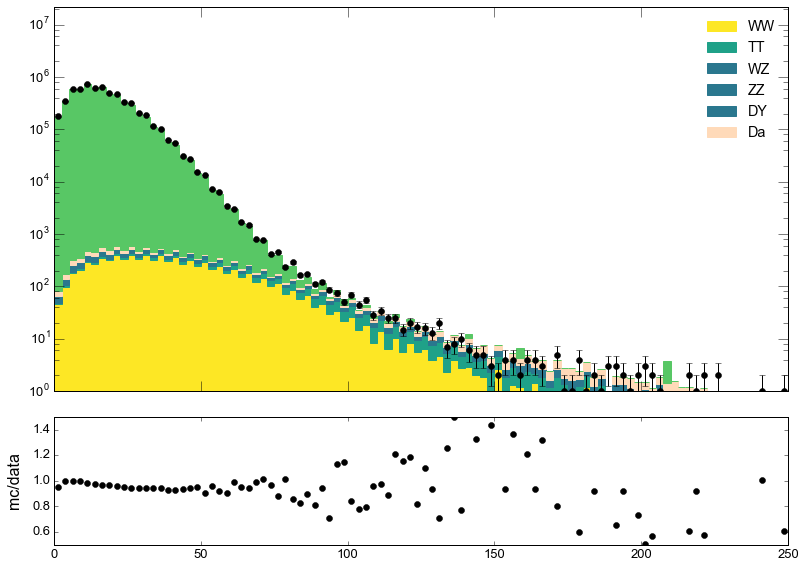

In [24]:
feature = "METProj"
range = (0, 250)

mc_bins = bin_df( df_mc[ (df_mc.mll > 50) & (df_mc.numb_jets ==0)], feature, range=range, scales=scales )
data_bins = bin_df( df_data[  (df_data.mll > 50) & (df_data.numb_jets ==0)], feature, range=range, scales=scales)
full_plot( mc_bins, data_bins,)

# End

In [25]:
scales

{'DY': 2.2842932418457296,
 'Da': 1,
 'TT': 0.04233110334591358,
 'WJ': 1,
 'WW': 0.11780092278022818,
 'WZ': 0.010445599285225466,
 'WZ_2l2q': 0.013721435700981659,
 'WZ_3ln': 0.010445599285225466,
 'ZZ': 0.018152313266614338}

In [46]:
features = ['nBJet', 'numb_jets', 'lep1_pt', 'lep2_pt', 'METProj', 'qT', 'mll', 'metMod', 'dPhiLLMET', 'dPhiLLJet', 'dPhiLL', 'HT', 'lep_Type' ] +\
            ['jetPt'+str(i) for i in xrange(1,3)] 

In [ ]:
range = (0,250)
bins = 100
feature = features[2]

In [7]:
bins_mc = bin_df( df_mc, feature, range=range, bins=bins)

In [52]:
range = (0,250)
bins = 50
feature = features[4]
processes = ["WW", "DY", "TT"]
bins_sept = {}
bins_mc = {}
for process in processes:
    bins_sept[process] = list(np.histogram(df_sept[ (df_sept[process] == 1) ][feature], range=range, bins=bins, density=True))
    bins_mc[process] = list(np.histogram(df_mc[df_mc.process == process][feature], range=range, bins=bins, density=True))

In [55]:
print feature
print bins_mc["WW"][0] / bins_sept["WW"][0]

METProj
[ 0.97041213  0.94618341  0.93823156  0.93289807  0.9303713   0.89529592
  0.92605571  0.93815181  0.95448468  0.95786775  1.02440228  1.0559784
  1.11480395  1.1637165   1.27144358  1.30841228  1.3193988   1.30878397
  1.36577964  1.30692622  1.36386931  1.26231388  1.32341741  1.26278214
  1.31511028  1.16532248  0.92900329  1.01475744  1.32016257  1.0451287
  1.23416445  0.97257755  0.84222826  1.0995895   1.20913351  1.2368387
  0.94329565  1.53367999  0.91879446  0.94942094  1.22784351  1.28631225
  0.78097529  1.09336541  1.22199663  0.42877075  0.50023254  1.12552322
  1.92946837  0.75034881]


METProj, 

In [56]:
df_mc.keys()

Index([u'lep1_pt', u'lep2_pt', u'lep3_pt', u'numb_jets', u'dPhiLL', u'qT',
       u'HT', u'lep1_Charge', u'lep2_Charge', u'lep_Type', u'lep1_type',
       u'lep2_type', u'lep1_eta', u'lep2_eta', u'lep1_phi', u'lep2_phi',
       u'lep1_iso', u'lep2_iso', u'lep1_mother', u'lep2_mother', u'met_trk',
       u'metMod', u'jetPt1', u'jetPt2', u'jetPt3', u'jetPt4', u'jetPt5',
       u'jetPt6', u'jet1_csv', u'jet2_csv', u'jet3_csv', u'jet1_phi',
       u'jet2_phi', u'jet1_eta', u'jet2_eta', u'numbExtraLep', u'mll',
       u'mllMET', u'recoil', u'dPhiLLJet', u'nBJet', u'nBJet_gen',
       u'dPhiLLMET', u'dPhiMETJet', u'METProj', u'METProj_sin',
       u'METProj_trk_sin', u'MET_phi', u'met_trk_phi', u'met_over_sET', u'npv',
       u'gen_npv', u'runNum', u'lumiSec', u'eventNumb', u'weights',
       u'process_decay', u'process'],
      dtype='object')

In [127]:
a = {"process":["a", "b", "c"], "key":[(1,2),(3,4),(4,5)] }
b = pd.DataFrame(a)

In [123]:
b = pd.read_csv("plotting_options.txt", index_col=None, sep=";" )

In [124]:
b

,process,scale,color
0,WW,19.7e3 * 59.8 / 10000431.0,"(0.993248, 0.906157, 0.143936)"
1,DY,19.7e3 * 3531.9 / 30459500.,"(0.344074, 0.780029, 0.397381)"
2,TT,19.7e3 * 25.81 / 12011428.,"(0.121380, 0.629492, 0.531973)"
3,ZZ,19.7e3 * 9.03 / 9799908.,"(1. , 0.85490196, 0.7254902 )"
4,WZ_2l2q,19.7e3 * 2.24 / 3215990,"(0.165117, 0.467423, 0.558141)"
5,WZ_3ln,19.7e3 * 1.07 / 2017979.,"(0.165117, 0.467423, 0.558141)"
6,Da,1,"(0, 0, 0)"


In [129]:
binning_options = pd.read_csv("binning_options.txt", index_col=None, sep=";" )
plotting_options = pd.read_csv("plotting_options.txt", index_col=None, sep=";" )

In [191]:
a = bin_df(df_mc, "mll", range=(76,106), bins=10)
a["WW"]

[array([ 354.22735596,  354.81637573,  344.56768799,  333.49441528,
         332.1986084 ,  323.59912109,  317.12008667,  306.04678345,
         282.25100708,  290.85046387], dtype=float32),
 array([  76.,   79.,   82.,   85.,   88.,   91.,   94.,   97.,  100.,
         103.,  106.]),
 array([  77.5,   80.5,   83.5,   86.5,   89.5,   92.5,   95.5,   98.5,
         101.5,  104.5]),
 array([ 3007.,  3012.,  2925.,  2831.,  2820.,  2747.,  2692.,  2598.,
         2396.,  2469.], dtype=float32)]

In [176]:
make_tuple(binning_options[ binning_options.feature == "mll" ].range.values[0])

(50, 250)

In [179]:
"mll" in binning_options.keys()

False

In [185]:
(a["WW"][1][1:]  - a["WW"][1][:-1]) / 2 + a["WW"][1][:-1]

array([  51.,   53.,   55.,   57.,   59.,   61.,   63.,   65.,   67.,
         69.,   71.,   73.,   75.,   77.,   79.,   81.,   83.,   85.,
         87.,   89.,   91.,   93.,   95.,   97.,   99.,  101.,  103.,
        105.,  107.,  109.,  111.,  113.,  115.,  117.,  119.,  121.,
        123.,  125.,  127.,  129.,  131.,  133.,  135.,  137.,  139.,
        141.,  143.,  145.,  147.,  149.,  151.,  153.,  155.,  157.,
        159.,  161.,  163.,  165.,  167.,  169.,  171.,  173.,  175.,
        177.,  179.,  181.,  183.,  185.,  187.,  189.,  191.,  193.,
        195.,  197.,  199.,  201.,  203.,  205.,  207.,  209.,  211.,
        213.,  215.,  217.,  219.,  221.,  223.,  225.,  227.,  229.,
        231.,  233.,  235.,  237.,  239.,  241.,  243.,  245.,  247.,  249.])